In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Data

In [ ]:
# Step 1: Load the Data
file_path_new = 'estat_nrg_bal_peh_filtered (1).tsv'

# Load the dataset using tab as the delimiter
data_new = pd.read_csv(file_path_new, delimiter='\t')

# Display its structure
data_new.head(), data_new.columns


(  freq,nrg_bal,siec,unit,geo\TIME_PERIOD      1990       1991       1992   \
 0          A,GEP,C0000X0350-0370,KTOE,AL     0.000      0.000      0.000    
 1          A,GEP,C0000X0350-0370,KTOE,AT   532.330    588.220    353.482    
 2          A,GEP,C0000X0350-0370,KTOE,BA         :          :          :    
 3          A,GEP,C0000X0350-0370,KTOE,BE  1469.905   1419.690   1376.612    
 4          A,GEP,C0000X0350-0370,KTOE,BG  1803.181   1786.328   1531.900    
 
        1993       1994       1995       1996       1997       1998   ...  \
 0     0.000      0.000      0.000      0.000      0.000      0.000   ...   
 1   256.664    266.552    371.539    453.826    501.376    354.514   ...   
 2         :          :          :          :          :          :   ...   
 3  1401.290   1460.017   1420.206   1337.145   1182.115   1219.862   ...   
 4  1475.494   1452.021   1489.424   1476.096   1623.732   1573.431   ...   
 
        2014       2015       2016       2017       2018       201

### Preprocessing

In [37]:
# Parse the combined column into separate columns
metadata_columns = data_new.columns[0].split(',')
data_new[metadata_columns] = data_new[data_new.columns[0]].str.split(',', expand=True)

# Drop the original combined column and adjust the dataset
data_new.drop(data_new.columns[0], axis=1, inplace=True)

# Strip any unwanted spaces from headers and row data
data_new.columns = data_new.columns.str.strip()
for col in metadata_columns:
    data_new[col] = data_new[col].str.strip()

# Display the modified data structure
data_new.head(), data_new.columns


(        1990       1991       1992       1993       1994       1995  \
 0     0.000      0.000      0.000      0.000      0.000      0.000    
 1   532.330    588.220    353.482    256.664    266.552    371.539    
 2         :          :          :          :          :          :    
 3  1469.905   1419.690   1376.612   1401.290   1460.017   1420.206    
 4  1803.181   1786.328   1531.900   1475.494   1452.021   1489.424    
 
         1996       1997       1998       1999  ...       2019       2020  \
 0     0.000      0.000      0.000      0.000   ...     0.000      0.000    
 1   453.826    501.376    354.514    379.536   ...   128.932     48.092    
 2         :          :          :          :   ...   942.648   1013.070    
 3  1337.145   1182.115   1219.862    854.600   ...     8.074      7.008    
 4  1476.096   1623.732   1573.431   1399.742   ...  1479.112   1161.708    
 
         2021       2022       2023 freq nrg_bal             siec  unit  \
 0     0.000      0.000    

In [41]:
data_new = data_new.rename(columns={
    'siec': 'Energy',
    'nrg_bal': 'Industry',
    'geo\TIME_PERIOD': 'Country',
})

data_new.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2019,2020,2021,2022,2023,freq,Industry,Energy,unit,Country
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,:,A,GEP,C0000X0350-0370,KTOE,AL
1,532.330,588.220,353.482,256.664,266.552,371.539,453.826,501.376,354.514,379.536,...,128.932,48.092,12.033,5.016,1.800,A,GEP,C0000X0350-0370,KTOE,AT
2,:,:,:,:,:,:,:,:,:,:,...,942.648,1013.070,955.374,940.327,:,A,GEP,C0000X0350-0370,KTOE,BA
3,1469.905,1419.690,1376.612,1401.290,1460.017,1420.206,1337.145,1182.115,1219.862,854.600,...,8.074,7.008,3.783,4.411,3.448,A,GEP,C0000X0350-0370,KTOE,BE
4,1803.181,1786.328,1531.900,1475.494,1452.021,1489.424,1476.096,1623.732,1573.431,1399.742,...,1479.112,1161.708,1469.122,1873.217,1008.445,A,GEP,C0000X0350-0370,KTOE,BG


Defining the mapping dictionary for energy column codes so it's understandable.

In [42]:
Energy_map = {
    
    "C0000X0350-0370": "Solid fossil fuels",
    "O4610": "Refinery gas",
    "O4694": "Petroleum coke",
    "O4699": "Other oil products n.e.c.",
    "O4669": "Other kerosene",
    "O4200": "Natural gas liquids",
    "G3000": "Natural gas",
    "O4640": "Naphtha",
    "O4652XR5210B": "Motor gasoline (excl.biofuel)",
    "O4630": "Liquefied petroleum gases",
    "O4653": "Gasoline-type jet fuel",
    "O4671XR5220B": "Gas oil and diesel oil (ex. biofuel)",
    "O4680": "Fuel oil",
    "O4620": "Ethane",
    "C0340": "Coal tar",
    "C0121": "Coking coal",
    "O4695": "Bitumen",
    "O4651": "Aviation gasoline",
    "O4400X4410": "Additives and oxygenates (excl. biofuel portion)",
    "O4691": "White spirit and special bioling point industrial spirits",
    "O4692": "Lubricants",
    "O4693": "Paraffin waxes"
 
}



# Applying the mappings to the 'Energy' column
data_new['Energy'] = data_new['Energy'].map(Energy_map).fillna(data_new['Energy'])
data_new[['Energy']].head()


,Energy
0,Solid fossil fuels
1,Solid fossil fuels
2,Solid fossil fuels
3,Solid fossil fuels
4,Solid fossil fuels


Industry column mappings, since we are only taking 2 industries to compare between, that are Electricity and Heating, so we will be mapping them here instead of abbreviated words.

In [43]:
industry_map = {
    'GEP': "Electricity production",
    'GHP': "Heat production"
}
# Apply the mappings to the 'Industry' column
data_new['Industry'] = data_new['Industry'].map(industry_map).fillna(data_new['Industry'])
data_new[['Industry']].head()


,Industry
0,Electricity production
1,Electricity production
2,Electricity production
3,Electricity production
4,Electricity production


In [44]:
# Convert ':' to NaN
data_new.replace(':', np.nan, inplace=True)

# Convert all year columns to numeric and handle NaN by interpolation
for year in range(1990, 2024):
    data_new[str(year)] = pd.to_numeric(data_new[str(year)], errors='coerce')
    data_new[str(year)] = data_new[str(year)].interpolate(method='linear', limit_direction='both')

# Check for remaining NaN values and display sample data to confirm changes
data_new.isna().sum(), data_new.head()


(1990        0
 1991        0
 1992        0
 1993        0
 1994        0
 1995        0
 1996        0
 1997        0
 1998        0
 1999        0
 2000        0
 2001        0
 2002        0
 2003        0
 2004        0
 2005        0
 2006        0
 2007        0
 2008        0
 2009        0
 2010        0
 2011        0
 2012        0
 2013        0
 2014        0
 2015        0
 2016        0
 2017        0
 2018        0
 2019        0
 2020        0
 2021        0
 2022        0
 2023        0
 freq        0
 Industry    0
 Energy      0
 unit        0
 Country     0
 dtype: int64,
         1990      1991      1992      1993       1994       1995       1996  \
 0     0.0000     0.000     0.000     0.000     0.0000     0.0000     0.0000   
 1   532.3300   588.220   353.482   256.664   266.5520   371.5390   453.8260   
 2  1001.1175  1003.955   865.047   828.977   863.2845   895.8725   895.4855   
 3  1469.9050  1419.690  1376.612  1401.290  1460.0170  1420.2060  1337.1450   


In [45]:
# Aggregate data by year for electricity and heat production
annual_production = data_new.groupby('Industry').sum().transpose()
annual_production.head(), annual_production.columns


C:\Users\Anum\AppData\Local\Temp\ipykernel_4808\58014558.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_production = data_new.groupby('Industry').sum().transpose()


(Industry  Electricity production  Heat production
 1990                 270755.9765      158166.6120
 1991                 271261.8195      152513.4405
 1992                 261724.8040      153271.9740
 1993                 253615.0115      144308.0525
 1994                 258294.0225      128757.9050,
 Index(['Electricity production', 'Heat production'], dtype='object', name='Industry'))

In [46]:
# Aggregate the data by energy source and year, summing up all the years
energy_production_totals = data_new.groupby(['Industry', 'Energy']).sum()

# Correct the aggregation to calculate proportions
proportions = energy_production_totals.div(energy_production_totals.groupby('Industry').sum()) * 100

# Display the proportions
proportions.head(20)


C:\Users\Anum\AppData\Local\Temp\ipykernel_4808\4019627588.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy_production_totals = data_new.groupby(['Industry', 'Energy']).sum()


1990  \
Industry               Energy                                                        
Electricity production Additives and oxygenates (excl. biofuel portion)   0.000000   
                       Aviation gasoline                                  0.000000   
                       Bitumen                                            0.000000   
                       Coal tar                                           0.000000   
                       Coking coal                                        3.352417   
                       Ethane                                             0.000000   
                       Fuel oil                                           9.705685   
                       Gas oil and diesel oil (ex. biofuel)               0.169298   
                       Gasoline-type jet fuel                             0.000000   
                       Liquefied petroleum gases                          0.001461   
                       Lubricants                                         0.000000   
                       Motor gasoline (excl.biofuel)                      0.000000   
                       Naphtha                                            0.000000   
                       Natural gas                                       14.433983   
                       Natural gas liquids                                0.000000   
                       Other kerosene                                     0.000064   
                       Other oil products n.e.c.                          5.662404   
                       Paraffin waxes                                     0.000000   
                       Petroleum coke                                     0.000556   
                       Refinery gas                                       0.133523   

                                                                              1991  \
Industry               Energy                                                        
Electricity production Additives and oxygenates (excl. biofuel portion)   0.000000   
                       Aviation gasoline                                  0.000000   
                       Bitumen                                            0.000000   
                       Coal tar                                           0.000000   
                       Coking coal                                        3.473686   
                       Ethane                                             0.000000   
                       Fuel oil                                          10.204507   
                       Gas oil and diesel oil (ex. biofuel)               0.172302   
                       Gasoline-type jet fuel                             0.000000   
                       Liquefied petroleum gases                          0.004882   
                       Lubricants                                         0.000000   
                       Motor gasoline (excl.biofuel)                      0.000000   
                       Naphtha                                            0.000000   
                       Natural gas                                       14.095126   
                       Natural gas liquids                                0.000000   
                       Other kerosene                                     0.000190   
                       Other oil products n.e.c.                          5.496874   
                       Paraffin waxes                                     0.000000   
                       Petroleum coke                                     0.000000   
                       Refinery gas                                       0.121626   

                                                                              1992  \
Industry               Energy                                                        
Electricity production Additives and oxygenates (excl. biofuel portion)   0.000000   
                       Aviation ga

### Visualizations

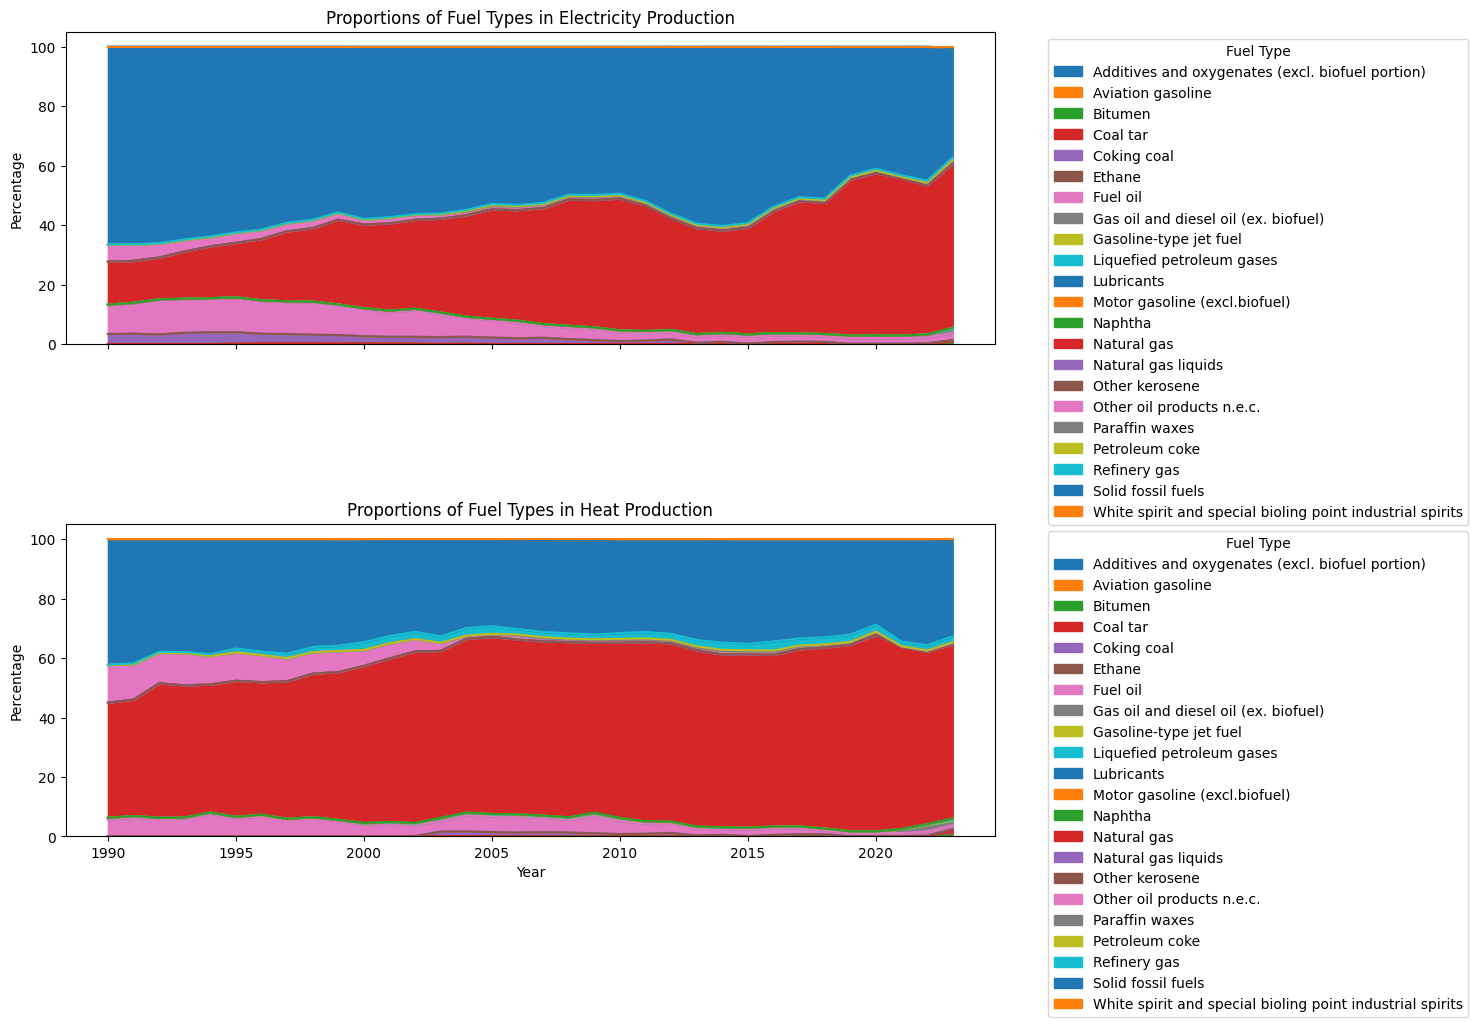

In [47]:
electricity_proportions = proportions.loc['Electricity production'].transpose()
heat_proportions = proportions.loc['Heat production'].transpose()

# Set up the matplotlib figures
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

# Plot for Electricity Production
electricity_proportions.plot(ax=axes[0], kind='area', stacked=True, title='Proportions of Fuel Types in Electricity Production')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for Heat Production
heat_proportions.plot(ax=axes[1], kind='area', stacked=True, title='Proportions of Fuel Types in Heat Production')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Year')
axes[1].legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [48]:
data_new.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2019,2020,2021,2022,2023,freq,Industry,Energy,unit,Country
0,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.800,A,Electricity production,Solid fossil fuels,KTOE,AL
1,532.3300,588.220,353.482,256.664,266.5520,371.5390,453.8260,501.3760,354.514,379.536,...,128.932,48.092,12.033,5.016,1.800,A,Electricity production,Solid fossil fuels,KTOE,AT
2,1001.1175,1003.955,865.047,828.977,863.2845,895.8725,895.4855,841.7455,787.188,617.068,...,942.648,1013.070,955.374,940.327,2.624,A,Electricity production,Solid fossil fuels,KTOE,BA
3,1469.9050,1419.690,1376.612,1401.290,1460.0170,1420.2060,1337.1450,1182.1150,1219.862,854.600,...,8.074,7.008,3.783,4.411,3.448,A,Electricity production,Solid fossil fuels,KTOE,BE
4,1803.1810,1786.328,1531.900,1475.494,1452.0210,1489.4240,1476.0960,1623.7320,1573.431,1399.742,...,1479.112,1161.708,1469.122,1873.217,1008.445,A,Electricity production,Solid fossil fuels,KTOE,BG


Now, let's focus on the years 2000 onwards again and check the head and data types. This is because I also wanted to compare in bar graphs which would be cluttered if using all years data. So just for that reason, I am pnly taking years from 2000 onwards.

In [49]:
years_of_interest = [str(year) for year in range(2000, 2024)]
data_interest = data_new[['Industry', 'Energy', 'unit', 'Country'] + years_of_interest]

data_interest.head(), data_interest.dtypes

(                 Industry              Energy  unit Country       2000  \
 0  Electricity production  Solid fossil fuels  KTOE      AL     0.0000   
 1  Electricity production  Solid fossil fuels  KTOE      AT   492.4330   
 2  Electricity production  Solid fossil fuels  KTOE      BA   801.5045   
 3  Electricity production  Solid fossil fuels  KTOE      BE  1110.5760   
 4  Electricity production  Solid fossil fuels  KTOE      BG  1456.6640   
 
         2001       2002      2003      2004       2005  ...      2014  \
 0     0.0000     0.0000     0.000     0.000     0.0000  ...     0.000   
 1   592.6910   568.6160   725.967   679.708   616.1840  ...   252.371   
 2   723.5165   715.4775   777.343   733.061   660.5855  ...   946.862   
 3   854.3420   862.3390   828.719   786.414   704.9870  ...   179.725   
 4  1676.4400  1477.3860  1654.084  1625.279  1587.1020  ...  1831.900   
 
        2015      2016      2017      2018      2019      2020      2021  \
 0     0.000     0.000    

In [50]:
# Sum up the data by 'Industry' and 'Energy' for the years 2000 to 2023
aggregate_data = data_interest.groupby(['Industry', 'Energy']).sum()

# Normalize the data to show proportions for each fuel type within electricity and heat production
aggregate_data_normalized = aggregate_data.div(aggregate_data.groupby('Industry').sum()) * 100

# Filter out the data for electricity and heat production
electricity_proportions = aggregate_data_normalized.xs('Electricity production', level='Industry')
heat_proportions = aggregate_data_normalized.xs('Heat production', level='Industry')

# Display the aggregated data
electricity_proportions.head(), heat_proportions.head()


C:\Users\Anum\AppData\Local\Temp\ipykernel_4808\2842974536.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregate_data = data_interest.groupby(['Industry', 'Energy']).sum()


(                                                      2000      2001  \
 Energy                                                                 
 Additives and oxygenates (excl. biofuel portion)  0.000000  0.000000   
 Aviation gasoline                                 0.000000  0.000000   
 Bitumen                                           0.234313  0.207861   
 Coal tar                                          0.003971  0.003384   
 Coking coal                                       2.373538  2.207895   
 
                                                       2002      2003  \
 Energy                                                                 
 Additives and oxygenates (excl. biofuel portion)  0.000000  0.000000   
 Aviation gasoline                                 0.000000  0.000000   
 Bitumen                                           0.157262  0.013903   
 Coal tar                                          0.007073  0.006725   
 Coking coal                                     

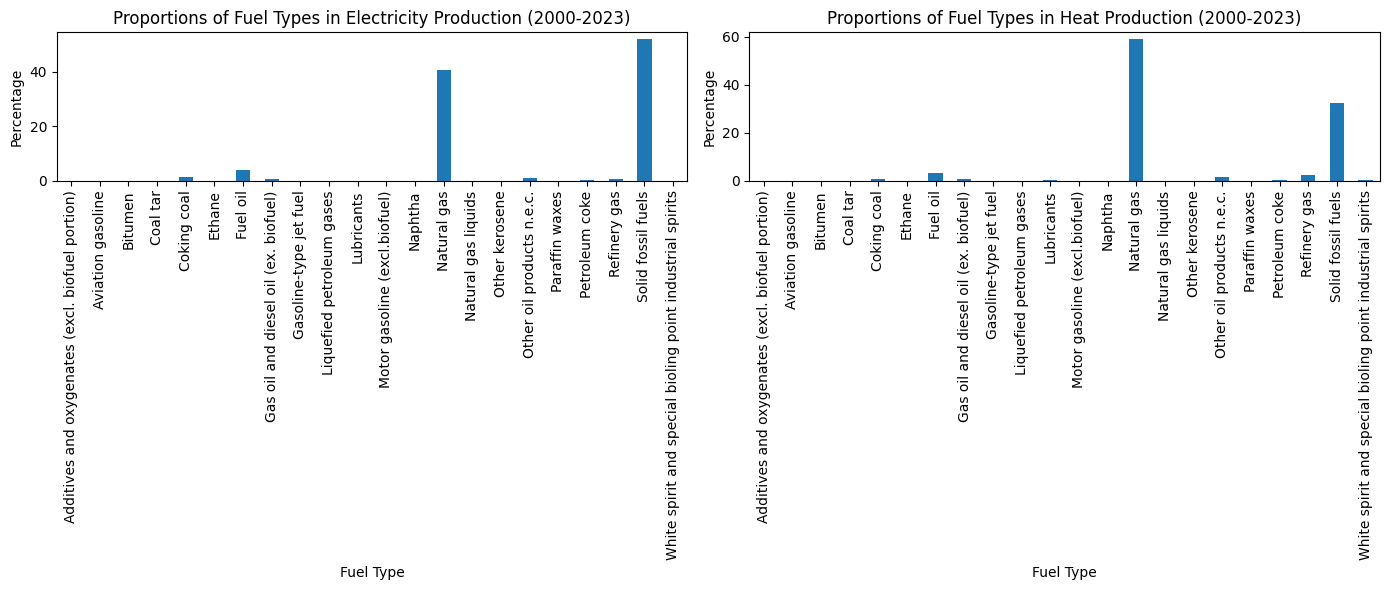

In [51]:
# Aggregate the data again using correct keys for 'GEP' and 'GHP'
electricity_proportions = aggregate_data_normalized.xs('Electricity production', level='Industry')
heat_proportions = aggregate_data_normalized.xs('Heat production', level='Industry')

# Visualization of the aggregated data from 2000 onwards as bar charts
import matplotlib.pyplot as plt

# Creating a function to plot the data
def plot_fuel_proportions(data, title, ax):
    data.mean(axis=1).plot(kind='bar', ax=ax)  # Calculate the mean proportion from 2000 onwards
    ax.set_title(title)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Fuel Type')

# Set up the matplotlib figures
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot data for Electricity and Heat Production
plot_fuel_proportions(electricity_proportions, 'Proportions of Fuel Types in Electricity Production (2000-2023)', axes[0])
plot_fuel_proportions(heat_proportions, 'Proportions of Fuel Types in Heat Production (2000-2023)', axes[1])

plt.tight_layout()
plt.show()


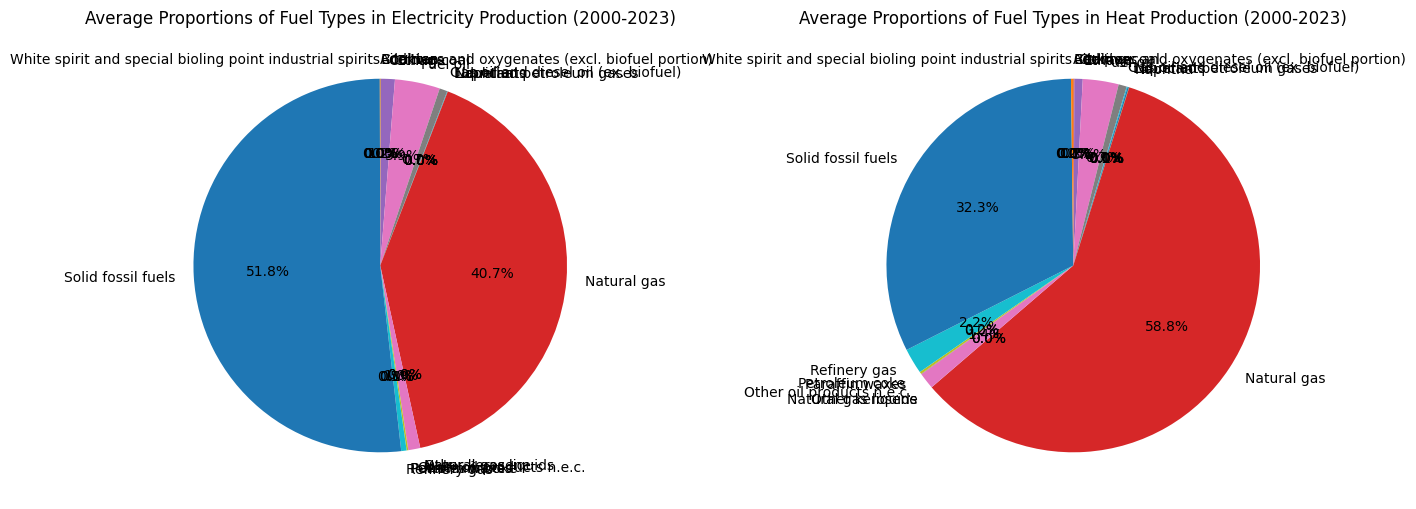

In [52]:
electricity_averages = electricity_proportions.mean(axis=1)
heat_averages = heat_proportions.mean(axis=1)

# Define a function to plot pie charts
def plot_pie_chart(data, title, ax):
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_ylabel('')
    ax.set_title(title)

# Set up the matplotlib figures
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plot pie charts for Electricity and Heat Production
plot_pie_chart(electricity_averages, 'Average Proportions of Fuel Types in Electricity Production (2000-2023)', axes[0])
plot_pie_chart(heat_averages, 'Average Proportions of Fuel Types in Heat Production (2000-2023)', axes[1])

plt.tight_layout()
plt.show()

All in all, from the above visualizations we can conclude that Oil, gas and coal proportions for Electricity and heating generation. The percentage most used in Electricity was Solid fossil fuels that would contain coal in general. While for Heat production, Natural gas was used the most. This answers the question for this task that which proportion of coal, oil, gas was used in Electricity production and Heating production.   